# Exploded Pie

In this example we'll do a pie plot with one of the slices exploded, showing it's subcategories on the side

## Data loading

We'll use the NASA meteorite dataset. To do so we'll need first to run the data manager using the %run magic code.

In [1]:
%run data_manager.py

At this poing we can load the data directly into a pandas dataframe

In [2]:
df = load_meteorites()
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,year_as_date
0,Aachen,1,Valid,L5,21.0,Fallen,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)",1880-01-01
1,Aarhus,2,Valid,H6,720.0,Fallen,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)",1951-01-01
2,Abee,6,Valid,EH4,107000.0,Fallen,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)",1952-01-01
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fallen,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)",1976-01-01
4,Achiras,370,Valid,L6,780.0,Fallen,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)",1902-01-01


## Selecting the plotted data
Three columns are good candidates for a pie chart:

In [3]:
print(df.nametype.unique())
print(df.fall.unique())
print(df.recclass.unique())

['Valid' 'Relict']
['Fallen' 'Found']
['L5' 'H6' 'EH4' 'Acapulcoite' 'L6' 'LL3-6' 'H5' 'L' 'Diogenite-pm' 'H4'
 'H' 'Iron, IVA' 'CR2-an' 'LL5' 'CI1' 'L/LL4' 'Eucrite-mmict' 'CV3'
 'Ureilite-an' 'Stone-uncl' 'L3' 'Angrite' 'LL6' 'L4' 'Aubrite'
 'Iron, IIAB' 'Iron, IAB-sLL' 'Iron, ungrouped' 'CM2' 'Mesosiderite-A1'
 'LL4' 'C2-ung' 'LL3.8' 'Howardite' 'Eucrite-pmict' 'Diogenite' 'LL3.15'
 'LL3.9' 'Iron, IAB-MG' 'H/L3.9' 'Eucrite' 'H4-an' 'L/LL6' 'Iron, IIIAB'
 'OC' 'H/L4' 'H4-5' 'L3.7' 'LL3.4' 'Martian (chassignite)' 'EL6' 'H3.8'
 'H3-5' 'H5-6' 'Mesosiderite' 'H5-7' 'L3-6' 'H4-6' 'Ureilite' 'Iron, IID'
 'Mesosiderite-A3/4' 'CO3.3' 'H3' 'EH3/4-an' 'Iron, IIE' 'L/LL5' 'H3.7'
 'CBa' 'H4/5' 'H3/4' 'H?' 'H3-6' 'L3.4' 'Iron, IAB-sHL' 'L3.7-6' 'EH7-an'
 'Iron' 'CR2' 'CO3.2' 'K3' 'L5/6' 'CK4' 'Iron, IIE-an' 'L3.6' 'LL3.2'
 'CO3.5' 'Lodranite' 'Mesosiderite-A3' 'L3-4' 'H5/6' 'Pallasite, PMG'
 'Eucrite-cm' 'Pallasite' 'L5-6' 'CO3.6' 'Martian (nakhlite)' 'LL3.6'
 'C3-ung' 'H3-4' 'CO3.4' 'EH3' 'Iron,

Given that we'd like to keep things simple, we are going to use `nametype` and `fall`. Let's extract the data.

In [4]:
#counting nametypes
nametypes_counts = df.nametype.value_counts(normalize = True)
print(nametypes_counts)

Valid     0.999449
Relict    0.000551
Name: nametype, dtype: float64


In [5]:
#counting fall status for "valid" asteroids
fall_counts_valid = df[df['nametype'] == 'Valid'].fall.value_counts(normalize = True)
print(fall_counts_valid)

Found     0.972043
Fallen    0.027957
Name: fall, dtype: float64


## First implementation, by hand

A first implementation, step by step

In [6]:
#standard imports
import matplotlib.pyplot as plt
import numpy as np

#setting off interactive mode, so that we can split the code among
#several cells, see:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ioff.html
plt.ioff()

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

### Adding a pie chart

In [7]:
#this magic suppresses output, without it the return value of
#the last command is printed. Unfortunately, maybe your jupyter
#does not support it. Give it a try!
#%%capture

# pie chart parameters
ratios = nametypes_counts
labels = nametypes_counts.index
explode = [0.3, 0]

# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]

#standard pie plot
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle, labels=labels, explode=explode)

([<matplotlib.patches.Wedge at 0x7f687bf0cca0>,
 [Text(1.399999999999997, -9.301805426282567e-08, 'Valid'),
  Text(-1.0999999999999905, 1.4610351288950233e-07, 'Relict')],
 [Text(0.8999999999999979, -5.979732059753079e-08, '99.9%'),
  Text(-0.5999999999999948, 7.96928252124558e-08, '0.1%')])

### Adding a bar chart

In [8]:
# bar chart parameters
xpos = 0
bottom = 0
ratios = fall_counts_valid
width = .2

#looping through all the available data points
for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom)
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100), ha='center')

#final aestethics brush upss
ax2.set_title('Valid entries')
ax2.legend(fall_counts_valid.index)
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

(-0.5, 0.5)

### Adding connecting lines

We are going to use [ConnectionPatch](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.ConnectionPatch.html) object to draw lines connecting
the pie to the bar plot.

Keep in mind that a pie slice is completely defined by four parameters:

* center
* radius (r)
* angle of the first side (theta1)
* angle of the second side (theta2)

We are going to first extract these numbers, then do some trigonometry to convert
those to coordinates:

* (x_start, y_start)
* (x_end, y_end)

for the two connectors.

In [9]:
from matplotlib.patches import ConnectionPatch

#extracting the pie slice parameters
center = ax1.patches[0].center #this is actually two values
r      = ax1.patches[0].r
theta1 = ax1.patches[0].theta1
theta2 = ax1.patches[0].theta2

#the bar is easier: it's just defined by its height
bar_height = sum([item.get_height() for item in ax2.patches])

# top connecting line, coordinates
x_start = r * np.cos(np.pi / 180 * theta2) + center[0]
y_start = r * np.sin(np.pi / 180 * theta2) + center[1]
x_end = -width / 2
y_end = bar_height

# top connecting line, drawing
con = ConnectionPatch(xyA=(x_start, y_start), coordsA=ax1.transData,
                      xyB=(x_end, y_end)    , coordsB=ax2.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# bottom connecting line, coordinates
x_start = r * np.cos(np.pi / 180 * theta1) + center[0]
y_start = r * np.sin(np.pi / 180 * theta1) + center[1]
x_end = -width / 2
y_end = 0

# top connecting line, drawing
con = ConnectionPatch(xyA=(x_start, y_start), coordsA=ax1.transData,
                      xyB=(x_end, y_end)    , coordsB=ax2.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

### Plotting the result

Let's turn the interactive mode back on and plot the result.

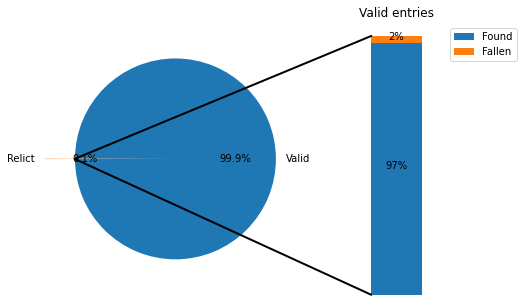

In [10]:
plt.ion()
plt.show()

# Assignments

The plot works, but with a very thin slice it's power is somewhat limited. Also, it would be nice to have reusable solution.

* ASSIGNMENT 1: write a function that accepts the two counts arguments and does the plot
* ASSIGNMENT 2: add a third argument to save on file (in folder "../results") instead of displaying the plot
* ASSIGNMENT 3: create a new column in the data that assigns meteorites to four categories based on their weight, and use it in the plot